In [1]:
import os

import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle


FTRAIN = '~/Desktop/MIDS/coursework/FinalProject/training.csv'
FTEST = '~/Desktop/MIDS/coursework/FinalProject/test.csv'


def load(test=False, cols=None):
    """Loads data from FTEST if *test* is True, otherwise from FTRAIN.
    Pass a list of *cols* if you're only interested in a subset of the
    target columns.
    """
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname))  # load pandas dataframe

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    print(df.count())  # prints the number of values for each column
    df = df.dropna()  # drop all rows that have missing values in them

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y


X, y = load()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [2]:
import time
start_time = time.time()
# add to kfkd.py
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, 9216),  # 96x96 input pixels per batch
    hidden_num_units=100,  # number of units in hidden layer
    output_nonlinearity=None,  # output layer uses identity function
    output_num_units=30,  # 30 target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,  # flag to indicate we're dealing with regression problem
    max_epochs=400,  # we want to train this many epochs
    verbose=1,
    )

X, y = load()
net1.fit(X, y)
trainTime = time.time() - start_time
print ('train time = %.2f' %(trainTime))

Using cuDNN version 5110 on context None
Mapped name None to device cuda: GeForce GTX 660M (0000:01:00.0)
/home/wyx/anaconda3/envs/theano9/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

    102     0.00448     0.00526    0.85109  0.06s
    103     0.00445     0.00524    0.85007  0.06s
    104     0.00443     0.00522    0.84892  0.06s
    105     0.00441     0.00520    0.84796  0.07s
    106     0.00439     0.00519    0.84684  0.07s
    107     0.00437     0.00517    0.84596  0.06s
    108     0.00435     0.00515    0.84504  0.06s
    109     0.00433     0.00513    0.84398  0.06s
    110     0.00431     0.00512    0.84281  0.06s
    111     0.00429     0.00510    0.84178  0.06s
    112     0.00428     0.00509    0.84068  0.07s
    113     0.00426     0.00507    0.83969  0.07s
    114     0.00424     0.00505    0.83882  0.07s
    115     0.00422     0.00504    0.83778  0.06s
    116     0.00420     0.00502    0.83689  0.06s
    117     0.00418     0.00500    0.83607  0.06s
    118     0.00416     0.00499    0.83480  0.06s
    119     0.00415     0.00497    0.83390  0.06s
    120     0.00413     0.00496    0.83275  0.07s
    121     0.00411     0.00494    0.83188  0.07s


    229     0.00293     0.00390    0.75058  0.06s
    230     0.00293     0.00390    0.75094  0.06s
    231     0.00292     0.00389    0.75070  0.06s
    232     0.00291     0.00389    0.74864  0.07s
    233     0.00290     0.00390    0.74354  0.07s
    234     0.00290     0.00393    0.73852  0.07s
    235     0.00292     0.00397    0.73493  0.07s
    236     0.00293     0.00398    0.73753  0.07s
    237     0.00292     0.00393    0.74268  0.07s
    238     0.00289     0.00387    0.74587  0.07s
    239     0.00287     0.00385    0.74398  0.07s
    240     0.00291     0.00395    0.73691  0.07s
    241     0.00307     0.00415    0.73959  0.07s
    242     0.00320     0.00417    0.76858  0.07s
    243     0.00310     0.00392    0.78995  0.07s
    244     0.00287     0.00388    0.73919  0.07s
    245     0.00302     0.00471    0.64181  0.07s
    246     0.00372     0.00550    0.67761  0.07s
    247     0.00385     0.00484    0.79547  0.07s
    248     0.00325     0.00401    0.81060  0.07s


    381     0.00239     0.00347    0.68854  0.06s
    382     0.00231     0.00337    0.68609  0.06s
    383     0.00224     0.00336    0.66677  0.06s
    384     0.00227     0.00348    0.65089  0.06s
    385     0.00237     0.00359    0.65922  0.06s
    386     0.00241     0.00355    0.67927  0.07s
    387     0.00233     0.00340    0.68545  0.07s
    388     0.00223     0.00334    0.66870  0.06s
    389     0.00226     0.00344    0.65495  0.06s
    390     0.00236     0.00353    0.66745  0.06s
    391     0.00237     0.00346    0.68669  0.06s
    392     0.00228     0.00334    0.68199  0.06s
    393     0.00221     0.00335    0.65994  0.06s
    394     0.00225     0.00349    0.64465  0.07s
    395     0.00237     0.00360    0.65825  0.06s
    396     0.00239     0.00352    0.67952  0.06s
    397     0.00229     0.00336    0.68163  0.06s
    398     0.00220     0.00333    0.66072  0.06s
    399     0.00225     0.00346    0.64926  0.06s
    400     0.00235     0.00352    0.66702  0.06s


/home/wyx/anaconda3/envs/theano9/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


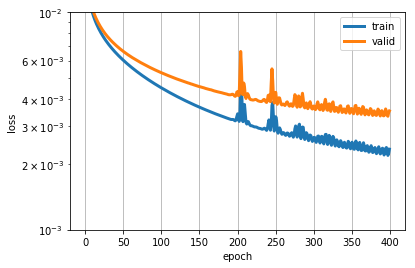

In [3]:
import matplotlib.pyplot as pyplot
train_loss = np.array([i["train_loss"] for i in net1.train_history_])
valid_loss = np.array([i["valid_loss"] for i in net1.train_history_])
pyplot.plot(train_loss, linewidth=3, label="train")
pyplot.plot(valid_loss, linewidth=3, label="valid")
pyplot.grid()
pyplot.legend()
pyplot.xlabel("epoch")
pyplot.ylabel("loss")
pyplot.ylim(1e-3, 1e-2)
pyplot.yscale("log")
pyplot.show()

In [4]:
def load2d(test=False, cols=None):
    X, y = load(test=test)
    X = X.reshape(-1, 1, 96, 96)
    return X, y


In [5]:

start_time = time.time()
net2 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,

    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,
    max_epochs=1000,
    verbose=1,
    )


X, y = load2d()  # load 2-d data
net2.fit(X, y)

# Training for 1000 epochs will take a while.  We'll pickle the
# trained model so that we can load it back later:
import cPickle as pickle
with open('net2.pickle', 'wb') as f:
    pickle.dump(net2, f, -1)
trainTime = time.time() - start_time
print ('train time = %.2f' %(trainTime))

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

    100     0.00430     0.00408    1.05297  7.04s
    101     0.00429     0.00408    1.05290  7.04s
    102     0.00429     0.00408    1.05285  9.04s
    103     0.00429     0.00407    1.05280  11.21s
    104     0.00429     0.00407    1.05273  11.20s
    105     0.00428     0.00407    1.05268  11.21s
    106     0.00428     0.00407    1.05262  11.21s
    107     0.00428     0.00406    1.05253  10.50s
    108     0.00427     0.00406    1.05244  7.03s
    109     0.00427     0.00406    1.05237  7.03s
    110     0.00427     0.00406    1.05229  7.04s
    111     0.00426     0.00405    1.05220  7.05s
    112     0.00426     0.00405    1.05211  7.05s
    113     0.00426     0.00405    1.05204  7.10s
    114     0.00426     0.00405    1.05196  7.04s
    115     0.00425     0.00404    1.05190  11.22s
    116     0.00425     0.00404    1.05182  11.31s
    117     0.00425     0.00404    1.05175  11.87s
    118     0.00424     0.00403    1.05166  11.45s
    119     0.00424     0.00403    1.0515

    221     0.00379     0.00364    1.03857  7.04s
    222     0.00378     0.00364    1.03842  7.05s
    223     0.00377     0.00364    1.03826  7.04s
    224     0.00377     0.00363    1.03812  7.03s
    225     0.00376     0.00363    1.03795  7.04s
    226     0.00376     0.00362    1.03782  7.05s
    227     0.00375     0.00362    1.03766  7.04s
    228     0.00375     0.00361    1.03750  7.04s
    229     0.00374     0.00361    1.03738  7.04s
    230     0.00374     0.00360    1.03723  7.05s
    231     0.00373     0.00360    1.03706  7.06s
    232     0.00372     0.00359    1.03692  7.04s
    233     0.00372     0.00359    1.03676  7.04s
    234     0.00371     0.00358    1.03664  7.05s
    235     0.00371     0.00358    1.03647  7.04s
    236     0.00370     0.00357    1.03630  7.02s
    237     0.00370     0.00357    1.03614  7.03s
    238     0.00369     0.00356    1.03601  7.04s
    239     0.00369     0.00356    1.03582  7.04s
    240     0.00368     0.00355    1.03567  7.04s


    342     0.00305     0.00304    1.00261  7.05s
    343     0.00305     0.00304    1.00217  7.06s
    344     0.00304     0.00303    1.00169  7.04s
    345     0.00303     0.00303    1.00125  7.05s
    346     0.00303     0.00302    1.00081  7.05s
    347     0.00302     0.00302    1.00037  7.06s
    348     0.00301     0.00301    0.99996  7.05s
    349     0.00301     0.00301    0.99953  7.04s
    350     0.00300     0.00300    0.99908  7.04s
    351     0.00299     0.00300    0.99864  7.03s
    352     0.00299     0.00299    0.99815  7.05s
    353     0.00298     0.00299    0.99765  7.03s
    354     0.00297     0.00298    0.99721  7.05s
    355     0.00297     0.00298    0.99675  7.05s
    356     0.00296     0.00297    0.99630  7.05s
    357     0.00295     0.00297    0.99583  7.07s
    358     0.00295     0.00296    0.99535  7.05s
    359     0.00294     0.00296    0.99491  7.04s
    360     0.00293     0.00295    0.99447  7.07s
    361     0.00293     0.00295    0.99403  7.03s


    463     0.00232     0.00245    0.94815  7.05s
    464     0.00231     0.00244    0.94772  7.03s
    465     0.00231     0.00244    0.94731  7.03s
    466     0.00231     0.00243    0.94686  7.04s
    467     0.00230     0.00243    0.94645  7.03s
    468     0.00230     0.00243    0.94602  7.04s
    469     0.00229     0.00242    0.94561  7.05s
    470     0.00229     0.00242    0.94520  7.06s
    471     0.00228     0.00241    0.94479  7.05s
    472     0.00228     0.00241    0.94438  7.07s
    473     0.00227     0.00241    0.94397  7.07s
    474     0.00227     0.00240    0.94355  7.05s
    475     0.00226     0.00240    0.94313  7.04s
    476     0.00226     0.00239    0.94273  7.04s
    477     0.00225     0.00239    0.94236  7.04s
    478     0.00225     0.00239    0.94196  7.06s
    479     0.00224     0.00238    0.94158  7.04s
    480     0.00224     0.00238    0.94118  7.06s
    481     0.00223     0.00237    0.94079  7.07s
    482     0.00223     0.00237    0.94043  7.05s


    584     0.00186     0.00206    0.90323  7.03s
    585     0.00186     0.00206    0.90287  7.06s
    586     0.00186     0.00206    0.90253  7.05s
    587     0.00185     0.00205    0.90221  7.06s
    588     0.00185     0.00205    0.90182  7.03s
    589     0.00185     0.00205    0.90154  7.04s
    590     0.00184     0.00205    0.90114  7.04s
    591     0.00184     0.00204    0.90078  7.03s
    592     0.00184     0.00204    0.90041  7.04s
    593     0.00184     0.00204    0.90007  7.05s
    594     0.00183     0.00204    0.89968  7.03s
    595     0.00183     0.00204    0.89932  7.06s
    596     0.00183     0.00203    0.89895  7.05s
    597     0.00183     0.00203    0.89861  7.05s
    598     0.00182     0.00203    0.89825  7.05s
    599     0.00182     0.00203    0.89787  7.05s
    600     0.00182     0.00203    0.89749  7.05s
    601     0.00182     0.00202    0.89714  7.05s
    602     0.00181     0.00202    0.89677  7.05s
    603     0.00181     0.00202    0.89638  7.04s


    705     0.00160     0.00186    0.86057  6.98s
    706     0.00160     0.00185    0.86022  6.98s
    707     0.00159     0.00185    0.85987  6.99s
    708     0.00159     0.00185    0.85953  6.98s
    709     0.00159     0.00185    0.85920  6.98s
    710     0.00159     0.00185    0.85886  8.04s
    711     0.00159     0.00185    0.85853  11.07s
    712     0.00159     0.00185    0.85815  11.05s
    713     0.00158     0.00185    0.85784  11.08s
    714     0.00158     0.00185    0.85744  8.37s
    715     0.00158     0.00184    0.85715  6.97s
    716     0.00158     0.00184    0.85679  6.99s
    717     0.00158     0.00184    0.85644  6.97s
    718     0.00158     0.00184    0.85608  6.99s
    719     0.00157     0.00184    0.85577  6.98s
    720     0.00157     0.00184    0.85544  6.99s
    721     0.00157     0.00184    0.85507  6.98s
    722     0.00157     0.00184    0.85472  7.00s
    723     0.00157     0.00183    0.85438  6.98s
    724     0.00157     0.00183    0.85401  7.1

    826     0.00142     0.00174    0.81857  11.30s
    827     0.00142     0.00174    0.81823  11.41s
    828     0.00142     0.00174    0.81787  10.75s
    829     0.00142     0.00174    0.81751  7.11s
    830     0.00142     0.00174    0.81721  7.18s
    831     0.00142     0.00174    0.81687  7.20s
    832     0.00142     0.00174    0.81653  7.11s
    833     0.00142     0.00174    0.81614  7.06s
    834     0.00141     0.00173    0.81585  7.10s
    835     0.00141     0.00173    0.81551  7.04s
    836     0.00141     0.00173    0.81518  7.02s
    837     0.00141     0.00173    0.81480  7.02s
    838     0.00141     0.00173    0.81445  7.00s
    839     0.00141     0.00173    0.81415  7.00s
    840     0.00141     0.00173    0.81378  11.01s
    841     0.00141     0.00173    0.81347  11.09s
    842     0.00141     0.00173    0.81314  11.09s
    843     0.00140     0.00173    0.81275  11.09s
    844     0.00140     0.00173    0.81246  10.70s
    845     0.00140     0.00173    0.81208

    947     0.00130     0.00166    0.77850  11.53s
    948     0.00130     0.00166    0.77817  11.51s
    949     0.00129     0.00166    0.77786  10.69s
    950     0.00129     0.00166    0.77757  7.22s
    951     0.00129     0.00166    0.77725  7.18s
    952     0.00129     0.00166    0.77692  7.17s
    953     0.00129     0.00166    0.77664  7.21s
    954     0.00129     0.00166    0.77633  7.13s
    955     0.00129     0.00166    0.77601  7.17s
    956     0.00129     0.00166    0.77567  7.20s
    957     0.00129     0.00166    0.77541  7.13s
    958     0.00129     0.00166    0.77510  7.23s
    959     0.00128     0.00166    0.77480  7.23s
    960     0.00128     0.00166    0.77448  7.15s
    961     0.00128     0.00166    0.77417  7.22s
    962     0.00128     0.00166    0.77385  11.33s
    963     0.00128     0.00166    0.77360  11.50s
    964     0.00128     0.00166    0.77323  11.51s
    965     0.00128     0.00166    0.77298  11.51s
    966     0.00128     0.00165    0.77266 

ModuleNotFoundError: No module named 'cPickle'

In [6]:
import pickle
with open('net2.pickle', 'wb') as f:
    pickle.dump(net2, f, -1)
trainTime = time.time() - start_time
print ('train time = %.2f' %(trainTime))

train time = 7649.48


In [19]:
from nolearn.lasagne import BatchIterator

class FlipBatchIterator(BatchIterator):
    flip_indices = [
        (0, 2), (1, 3),
        (4, 8), (5, 9), (6, 10), (7, 11),
        (12, 16), (13, 17), (14, 18), (15, 19),
        (22, 24), (23, 25),
        ]

    def transform(self, Xb, yb):
        Xb, yb = super(FlipBatchIterator, self).transform(Xb, yb)

        # Flip half of the images in this batch at random:
        bs = Xb.shape[0]
        indices = np.random.choice(bs, int(bs / 2), replace=False)
        Xb[indices] = Xb[indices, :, :, ::-1]

        if yb is not None:
            # Horizontal flip of all x coordinates:
            yb[indices, ::2] = yb[indices, ::2] * -1

            # Swap places, e.g. left_eye_center_x -> right_eye_center_x
            for a, b in self.flip_indices:
                yb[indices, a], yb[indices, b] = (
                    yb[indices, b], yb[indices, a])

        return Xb, yb
    
net3 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,

    update_learning_rate=0.01,
    update_momentum=0.9,
    
    regression=True,
    batch_iterator_train=FlipBatchIterator(batch_size=128),
    max_epochs=3000,
    verbose=1,
    )

In [21]:
start_time = time.time()
net3.fit(X, y)
trainTime = time.time() - start_time

import pickle
with open('net3.pickle', 'wb') as f:
    pickle.dump(net3, f, -1)

     13     0.00558     0.00524    1.06571  5.00s
     14     0.00548     0.00516    1.06243  5.24s
     15     0.00540     0.00507    1.06389  5.45s
     16     0.00532     0.00501    1.06140  5.59s
     17     0.00527     0.00494    1.06516  5.75s
     18     0.00519     0.00487    1.06459  5.89s
     19     0.00513     0.00483    1.06209  5.99s
     20     0.00508     0.00476    1.06729  5.92s
     21     0.00503     0.00472    1.06610  6.08s
     22     0.00498     0.00467    1.06614  6.22s
     23     0.00494     0.00464    1.06467  6.21s
     24     0.00490     0.00461    1.06374  6.37s
     25     0.00487     0.00457    1.06648  6.37s
     26     0.00484     0.00454    1.06520  6.59s
     27     0.00480     0.00452    1.06181  6.59s
     28     0.00477     0.00448    1.06401  6.60s
     29     0.00475     0.00446    1.06292  6.60s
     30     0.00472     0.00443    1.06608  6.60s
     31     0.00470     0.00441    1.06452  6.60s
     32     0.00468     0.00440    1.06307  6.60s


    141     0.00416     0.00392    1.06304  7.04s
    142     0.00415     0.00392    1.05967  7.08s
    143     0.00415     0.00391    1.06178  7.04s
    144     0.00415     0.00392    1.05890  7.04s
    145     0.00414     0.00392    1.05690  7.04s
    146     0.00414     0.00391    1.05912  7.04s
    147     0.00414     0.00389    1.06265  7.11s
    148     0.00413     0.00390    1.05843  11.23s
    149     0.00413     0.00389    1.06054  11.24s
    150     0.00412     0.00389    1.06152  11.21s
    151     0.00412     0.00389    1.06015  11.23s
    152     0.00412     0.00389    1.05747  11.21s
    153     0.00411     0.00387    1.06053  9.60s
    154     0.00410     0.00387    1.06081  7.03s
    155     0.00411     0.00387    1.06218  7.04s
    156     0.00410     0.00387    1.05959  7.03s
    157     0.00410     0.00386    1.06008  7.03s
    158     0.00409     0.00386    1.05978  7.04s
    159     0.00408     0.00386    1.05712  7.06s
    160     0.00408     0.00385    1.05834  7

    269     0.00354     0.00335    1.05851  11.07s
    270     0.00352     0.00334    1.05404  11.05s
    271     0.00352     0.00334    1.05412  9.79s
    272     0.00351     0.00333    1.05366  6.97s
    273     0.00351     0.00333    1.05508  6.98s
    274     0.00350     0.00332    1.05554  6.97s
    275     0.00350     0.00332    1.05434  7.00s
    276     0.00349     0.00330    1.05585  6.98s
    277     0.00349     0.00331    1.05452  6.98s
    278     0.00348     0.00330    1.05632  6.98s
    279     0.00347     0.00330    1.04969  6.98s
    280     0.00347     0.00329    1.05435  6.98s
    281     0.00346     0.00328    1.05439  6.98s
    282     0.00345     0.00327    1.05461  7.00s
    283     0.00344     0.00329    1.04777  6.98s
    284     0.00345     0.00327    1.05497  7.00s
    285     0.00344     0.00327    1.05163  6.99s
    286     0.00344     0.00326    1.05439  6.98s
    287     0.00342     0.00326    1.04965  6.97s
    288     0.00341     0.00325    1.04967  6.97

    396     0.00271     0.00265    1.02067  11.07s
    397     0.00270     0.00265    1.02107  11.07s
    398     0.00270     0.00265    1.01991  11.06s
    399     0.00269     0.00264    1.01874  11.09s
    400     0.00268     0.00263    1.01987  10.79s
    401     0.00268     0.00263    1.01682  6.98s
    402     0.00267     0.00262    1.01773  6.99s
    403     0.00266     0.00262    1.01556  6.97s
    404     0.00265     0.00261    1.01330  6.99s
    405     0.00264     0.00262    1.00964  6.97s
    406     0.00265     0.00260    1.01736  6.98s
    407     0.00264     0.00260    1.01162  6.99s
    408     0.00264     0.00260    1.01553  6.98s
    409     0.00263     0.00259    1.01479  11.02s
    410     0.00262     0.00259    1.01319  11.07s
    411     0.00261     0.00259    1.00889  11.05s
    412     0.00261     0.00258    1.01440  11.06s
    413     0.00260     0.00258    1.00788  11.08s
    414     0.00259     0.00257    1.00918  10.07s
    415     0.00258     0.00257    1.00

    524     0.00214     0.00220    0.97305  6.99s
    525     0.00213     0.00220    0.97023  7.00s
    526     0.00213     0.00220    0.97034  6.99s
    527     0.00212     0.00219    0.96848  6.98s
    528     0.00212     0.00219    0.96824  6.99s
    529     0.00213     0.00219    0.97292  6.98s
    530     0.00211     0.00218    0.96636  6.99s
    531     0.00211     0.00218    0.96990  6.98s
    532     0.00211     0.00218    0.96799  6.98s
    533     0.00210     0.00218    0.96395  6.98s
    534     0.00211     0.00217    0.97048  6.98s
    535     0.00210     0.00217    0.96726  7.00s
    536     0.00210     0.00218    0.96535  6.98s
    537     0.00209     0.00217    0.96431  6.97s
    538     0.00210     0.00217    0.96871  6.98s
    539     0.00209     0.00216    0.96707  6.97s
    540     0.00209     0.00216    0.96967  6.97s
    541     0.00209     0.00216    0.96576  6.97s
    542     0.00208     0.00216    0.96310  6.97s
    543     0.00208     0.00215    0.96663  6.99s


    659     0.00184     0.00195    0.94197  6.98s
    660     0.00183     0.00195    0.93933  6.98s
    661     0.00182     0.00195    0.93707  6.97s
    662     0.00183     0.00195    0.94049  6.98s
    663     0.00183     0.00195    0.93927  6.97s
    664     0.00182     0.00195    0.93519  6.97s
    665     0.00182     0.00195    0.93433  6.96s
    666     0.00182     0.00194    0.93798  6.97s
    667     0.00181     0.00194    0.93436  6.97s
    668     0.00181     0.00194    0.92991  6.98s
    669     0.00181     0.00194    0.93421  6.99s
    670     0.00182     0.00194    0.93771  7.00s
    671     0.00182     0.00194    0.93566  6.98s
    672     0.00181     0.00193    0.93382  7.00s
    673     0.00180     0.00193    0.93521  6.98s
    674     0.00180     0.00193    0.93501  6.98s
    675     0.00180     0.00193    0.93501  6.99s
    676     0.00179     0.00193    0.93052  6.98s
    677     0.00179     0.00192    0.93247  6.98s
    678     0.00179     0.00192    0.93009  6.98s


    800     0.00163     0.00179    0.90928  6.99s
    801     0.00163     0.00179    0.91104  7.00s
    802     0.00162     0.00179    0.90627  6.99s
    803     0.00162     0.00179    0.90735  6.99s
    804     0.00163     0.00179    0.91167  6.98s
    805     0.00163     0.00179    0.91027  6.99s
    806     0.00162     0.00179    0.90609  6.99s
    807     0.00162     0.00179    0.90402  6.98s
    808     0.00162     0.00178    0.90712  6.99s
    809     0.00163     0.00179    0.91071  6.98s
    810     0.00162     0.00179    0.90751  6.98s
    811     0.00162     0.00178    0.91007  6.98s
    812     0.00162     0.00178    0.90751  6.97s
    813     0.00161     0.00178    0.90425  6.97s
    814     0.00161     0.00178    0.90387  6.96s
    815     0.00160     0.00178    0.90218  6.98s
    816     0.00162     0.00178    0.90697  6.96s
    817     0.00161     0.00178    0.90798  6.97s
    818     0.00161     0.00177    0.90963  6.99s
    819     0.00161     0.00178    0.90585  6.97s


    944     0.00149     0.00169    0.88298  6.97s
    945     0.00148     0.00168    0.87982  6.97s
    946     0.00148     0.00169    0.88023  6.98s
    947     0.00149     0.00168    0.88738  6.99s
    948     0.00149     0.00168    0.88532  7.00s
    949     0.00149     0.00168    0.88288  6.98s
    950     0.00148     0.00168    0.88161  6.98s
    951     0.00148     0.00168    0.88378  6.98s
    952     0.00148     0.00168    0.87919  6.98s
    953     0.00148     0.00168    0.88042  6.98s
    954     0.00147     0.00168    0.87897  6.98s
    955     0.00149     0.00168    0.88624  6.99s
    956     0.00148     0.00168    0.88002  7.00s
    957     0.00148     0.00168    0.88288  10.91s
    958     0.00148     0.00168    0.88178  11.06s
    959     0.00147     0.00168    0.87937  10.06s
    960     0.00148     0.00168    0.88063  6.98s
    961     0.00148     0.00167    0.88471  6.99s
    962     0.00146     0.00167    0.87372  6.98s
    963     0.00147     0.00167    0.88020  6.9

   1091     0.00137     0.00161    0.85353  6.98s
   1092     0.00138     0.00161    0.85821  6.98s
   1093     0.00138     0.00161    0.85641  6.98s
   1094     0.00137     0.00161    0.85279  6.99s
   1095     0.00137     0.00161    0.85045  6.99s
   1096     0.00137     0.00160    0.85468  6.99s
   1097     0.00138     0.00161    0.86033  6.99s
   1098     0.00138     0.00161    0.85639  6.97s
   1099     0.00137     0.00160    0.85413  7.00s
   1100     0.00137     0.00160    0.85296  6.99s
   1101     0.00137     0.00160    0.85265  6.99s
   1102     0.00136     0.00160    0.85193  6.99s
   1103     0.00136     0.00161    0.84532  6.98s
   1104     0.00136     0.00160    0.84855  7.00s
   1105     0.00137     0.00160    0.85436  6.99s
   1106     0.00137     0.00160    0.85472  6.99s
   1107     0.00136     0.00160    0.85085  7.00s
   1108     0.00136     0.00160    0.84872  6.99s
   1109     0.00136     0.00160    0.84637  6.98s
   1110     0.00136     0.00160    0.84916  6.98s


   1242     0.00128     0.00155    0.82716  6.98s
   1243     0.00129     0.00155    0.83229  6.99s
   1244     0.00129     0.00155    0.83422  6.98s
   1245     0.00129     0.00154    0.83414  6.99s
   1246     0.00128     0.00154    0.83167  6.99s
   1247     0.00129     0.00154    0.83676  6.98s
   1248     0.00128     0.00154    0.82829  6.98s
   1249     0.00129     0.00154    0.83262  6.98s
   1250     0.00128     0.00155    0.82753  6.98s
   1251     0.00128     0.00155    0.83010  6.98s
   1252     0.00127     0.00154    0.82504  6.97s
   1253     0.00128     0.00154    0.83003  6.99s
   1254     0.00128     0.00154    0.83075  6.98s
   1255     0.00128     0.00154    0.82904  6.97s
   1256     0.00128     0.00154    0.82832  6.97s
   1257     0.00128     0.00154    0.82865  6.98s
   1258     0.00127     0.00154    0.82580  6.97s
   1259     0.00127     0.00154    0.82253  6.97s
   1260     0.00128     0.00154    0.83175  6.99s
   1261     0.00127     0.00154    0.82473  6.98s


   1395     0.00121     0.00150    0.80354  6.96s
   1396     0.00121     0.00150    0.80618  6.97s
   1397     0.00120     0.00150    0.80351  6.97s
   1398     0.00120     0.00150    0.80362  6.99s
   1399     0.00121     0.00150    0.81009  6.99s
   1400     0.00120     0.00150    0.80195  6.98s
   1401     0.00121     0.00150    0.80669  6.99s
   1402     0.00121     0.00150    0.80342  6.98s
   1403     0.00121     0.00150    0.80815  6.99s
   1404     0.00120     0.00150    0.80504  6.99s
   1405     0.00120     0.00150    0.80413  6.98s
   1406     0.00120     0.00150    0.80129  6.98s
   1407     0.00121     0.00149    0.81147  6.99s
   1408     0.00120     0.00150    0.80145  6.99s
   1409     0.00120     0.00150    0.80419  6.98s
   1410     0.00120     0.00149    0.80390  6.97s
   1411     0.00120     0.00149    0.80200  6.98s
   1412     0.00120     0.00149    0.80230  7.00s
   1413     0.00120     0.00149    0.80044  6.97s
   1414     0.00119     0.00149    0.79616  6.98s


   1549     0.00114     0.00146    0.77834  9.24s
   1550     0.00114     0.00146    0.78189  6.98s
   1551     0.00114     0.00146    0.78092  6.97s
   1552     0.00115     0.00146    0.78813  6.96s
   1553     0.00115     0.00146    0.78595  6.97s
   1554     0.00114     0.00146    0.78015  6.97s
   1555     0.00113     0.00146    0.77674  6.98s
   1556     0.00114     0.00146    0.77882  6.98s
   1557     0.00113     0.00146    0.77663  6.97s
   1558     0.00114     0.00146    0.77998  7.00s
   1559     0.00115     0.00146    0.78517  6.98s
   1560     0.00114     0.00146    0.78056  6.98s
   1561     0.00114     0.00146    0.78097  6.98s
   1562     0.00113     0.00146    0.77630  6.99s
   1563     0.00114     0.00146    0.78621  7.00s
   1564     0.00113     0.00145    0.77826  6.99s
   1565     0.00114     0.00146    0.77962  6.99s
   1566     0.00114     0.00146    0.78047  6.99s
   1567     0.00114     0.00146    0.78467  6.99s
   1568     0.00114     0.00145    0.78047  6.99s


   1703     0.00109     0.00143    0.76283  6.99s
   1704     0.00109     0.00143    0.76073  6.98s
   1705     0.00109     0.00143    0.76277  6.99s
   1706     0.00109     0.00143    0.76205  6.99s
   1707     0.00109     0.00143    0.76162  7.00s
   1708     0.00108     0.00143    0.75808  6.98s
   1709     0.00108     0.00143    0.75707  6.99s
   1710     0.00109     0.00143    0.76372  6.99s
   1711     0.00108     0.00142    0.75896  7.00s
   1712     0.00108     0.00143    0.75751  7.00s
   1713     0.00109     0.00143    0.76150  7.00s
   1714     0.00108     0.00142    0.75928  6.99s
   1715     0.00109     0.00143    0.75967  6.99s
   1716     0.00108     0.00143    0.75548  6.98s
   1717     0.00108     0.00143    0.75557  6.99s
   1718     0.00108     0.00143    0.75797  6.99s
   1719     0.00108     0.00143    0.75534  6.97s
   1720     0.00107     0.00143    0.75379  6.98s
   1721     0.00108     0.00143    0.75437  6.99s
   1722     0.00108     0.00143    0.75805  7.00s


   1859     0.00103     0.00141    0.73438  6.98s
   1860     0.00104     0.00140    0.73785  6.97s
   1861     0.00104     0.00141    0.73888  6.97s
   1862     0.00104     0.00140    0.74601  6.98s
   1863     0.00104     0.00141    0.73584  6.99s
   1864     0.00104     0.00140    0.74005  6.97s
   1865     0.00103     0.00140    0.73461  6.97s
   1866     0.00103     0.00140    0.73708  6.98s
   1867     0.00103     0.00140    0.73807  6.98s
   1868     0.00103     0.00141    0.73309  6.97s
   1869     0.00103     0.00140    0.73505  6.98s
   1870     0.00103     0.00140    0.73434  6.97s
   1871     0.00104     0.00141    0.73752  6.99s
   1872     0.00103     0.00140    0.73604  6.98s
   1873     0.00103     0.00140    0.73670  6.98s
   1874     0.00103     0.00140    0.73160  6.98s
   1875     0.00103     0.00140    0.73623  7.01s
   1876     0.00103     0.00140    0.73873  6.99s
   1877     0.00104     0.00140    0.73930  6.98s
   1878     0.00103     0.00140    0.73423  7.00s


   2015     0.00099     0.00138    0.71447  10.65s
   2016     0.00099     0.00138    0.71555  6.98s
   2017     0.00099     0.00138    0.71417  6.98s
   2018     0.00099     0.00138    0.71346  6.98s
   2019     0.00099     0.00138    0.71803  6.98s
   2020     0.00099     0.00138    0.71717  6.98s
   2021     0.00099     0.00138    0.71282  6.98s
   2022     0.00099     0.00138    0.71964  6.98s
   2023     0.00099     0.00138    0.71791  6.97s
   2024     0.00099     0.00138    0.71337  6.98s
   2025     0.00099     0.00138    0.71507  6.98s
   2026     0.00099     0.00138    0.71531  6.97s
   2027     0.00099     0.00138    0.71833  6.99s
   2028     0.00098     0.00138    0.71148  6.97s
   2029     0.00098     0.00138    0.71342  6.97s
   2030     0.00099     0.00138    0.71438  6.97s
   2031     0.00099     0.00138    0.71463  6.97s
   2032     0.00098     0.00138    0.70977  6.99s
   2033     0.00099     0.00138    0.71724  6.98s
   2034     0.00098     0.00138    0.71172  6.98s

   2173     0.00095     0.00136    0.69721  7.00s
   2174     0.00095     0.00136    0.69640  6.99s
   2175     0.00095     0.00136    0.69285  7.00s
   2176     0.00095     0.00136    0.69526  7.00s
   2177     0.00095     0.00137    0.69597  7.00s
   2178     0.00096     0.00136    0.70240  6.99s
   2179     0.00095     0.00136    0.69572  6.99s
   2180     0.00095     0.00137    0.69369  6.99s
   2181     0.00095     0.00136    0.69636  7.01s
   2182     0.00094     0.00136    0.68887  6.99s
   2183     0.00095     0.00136    0.69330  6.99s
   2184     0.00095     0.00136    0.69434  6.99s
   2185     0.00094     0.00136    0.68960  6.99s
   2186     0.00095     0.00136    0.69559  6.99s
   2187     0.00095     0.00136    0.69657  6.99s
   2188     0.00095     0.00136    0.69424  7.00s
   2189     0.00095     0.00136    0.69372  6.99s
   2190     0.00094     0.00136    0.69448  7.00s
   2191     0.00095     0.00136    0.69426  6.98s
   2192     0.00094     0.00136    0.69360  6.99s


   2331     0.00091     0.00135    0.67897  6.96s
   2332     0.00091     0.00135    0.67653  6.98s
   2333     0.00091     0.00135    0.67038  6.97s
   2334     0.00091     0.00135    0.67682  6.97s
   2335     0.00091     0.00135    0.67304  6.97s
   2336     0.00091     0.00135    0.67308  6.98s
   2337     0.00091     0.00134    0.67877  6.99s
   2338     0.00091     0.00135    0.67402  6.97s
   2339     0.00091     0.00135    0.67305  6.98s
   2340     0.00090     0.00135    0.66991  6.98s
   2341     0.00091     0.00135    0.67441  6.99s
   2342     0.00090     0.00135    0.66984  7.00s
   2343     0.00091     0.00135    0.67605  7.00s
   2344     0.00091     0.00135    0.67053  10.95s
   2345     0.00091     0.00135    0.67328  11.07s
   2346     0.00091     0.00134    0.67379  11.05s
   2347     0.00090     0.00135    0.66911  8.09s
   2348     0.00091     0.00135    0.67505  6.97s
   2349     0.00090     0.00135    0.66943  6.98s
   2350     0.00091     0.00135    0.67379  6.9

   2488     0.00088     0.00133    0.65622  6.98s
   2489     0.00088     0.00133    0.65666  6.98s
   2490     0.00087     0.00133    0.65501  6.98s
   2491     0.00087     0.00134    0.65504  6.99s
   2492     0.00087     0.00134    0.65173  6.99s
   2493     0.00087     0.00134    0.65213  6.99s
   2494     0.00087     0.00133    0.65418  6.97s
   2495     0.00087     0.00133    0.65303  6.98s
   2496     0.00087     0.00133    0.65932  6.98s
   2497     0.00086     0.00134    0.64538  6.98s
   2498     0.00087     0.00134    0.65487  6.97s
   2499     0.00088     0.00133    0.65926  6.97s
   2500     0.00087     0.00133    0.65538  6.97s
   2501     0.00087     0.00133    0.65243  6.98s
   2502     0.00087     0.00133    0.65363  6.99s
   2503     0.00087     0.00133    0.65289  6.97s
   2504     0.00087     0.00133    0.65609  6.97s
   2505     0.00087     0.00133    0.65495  6.97s
   2506     0.00087     0.00133    0.65031  6.96s
   2507     0.00087     0.00133    0.65409  6.97s


   2648     0.00084     0.00132    0.63539  6.99s
   2649     0.00083     0.00132    0.63259  6.99s
   2650     0.00084     0.00132    0.63593  6.99s
   2651     0.00084     0.00132    0.63307  6.98s
   2652     0.00084     0.00132    0.63343  6.99s
   2653     0.00084     0.00132    0.63682  6.99s
   2654     0.00084     0.00132    0.63433  7.01s
   2655     0.00084     0.00132    0.63663  6.99s
   2656     0.00083     0.00132    0.63059  6.99s
   2657     0.00084     0.00132    0.63159  6.99s
   2658     0.00083     0.00132    0.63330  6.99s
   2659     0.00084     0.00132    0.63723  7.00s
   2660     0.00084     0.00132    0.63897  6.98s
   2661     0.00084     0.00131    0.63591  6.99s
   2662     0.00083     0.00132    0.63024  6.99s
   2663     0.00084     0.00132    0.63633  6.99s
   2664     0.00084     0.00132    0.63555  7.00s
   2665     0.00084     0.00132    0.63586  6.97s
   2666     0.00084     0.00132    0.64067  6.98s
   2667     0.00083     0.00132    0.63320  6.98s


   2806     0.00081     0.00131    0.61741  6.97s
   2807     0.00081     0.00131    0.61534  6.97s
   2808     0.00080     0.00131    0.61223  6.97s
   2809     0.00081     0.00131    0.61324  6.99s
   2810     0.00080     0.00131    0.61524  6.97s
   2811     0.00081     0.00131    0.61808  6.96s
   2812     0.00081     0.00131    0.61574  6.96s
   2813     0.00081     0.00131    0.62174  6.97s
   2814     0.00081     0.00131    0.61595  6.98s
   2815     0.00081     0.00130    0.62008  6.99s
   2816     0.00081     0.00131    0.61819  6.98s
   2817     0.00080     0.00131    0.61392  6.99s
   2818     0.00080     0.00131    0.61282  6.99s
   2819     0.00081     0.00131    0.61878  6.99s
   2820     0.00080     0.00131    0.61107  6.98s
   2821     0.00080     0.00131    0.61267  6.98s
   2822     0.00081     0.00130    0.61702  6.99s
   2823     0.00080     0.00131    0.61294  6.99s
   2824     0.00081     0.00131    0.61550  6.99s
   2825     0.00081     0.00131    0.61804  6.98s


   2966     0.00078     0.00130    0.60056  6.98s
   2967     0.00077     0.00130    0.59416  6.97s
   2968     0.00078     0.00130    0.59982  6.98s
   2969     0.00078     0.00130    0.59794  6.98s
   2970     0.00078     0.00130    0.59714  6.97s
   2971     0.00078     0.00130    0.59714  6.97s
   2972     0.00077     0.00130    0.59571  6.97s
   2973     0.00078     0.00130    0.60142  6.96s
   2974     0.00077     0.00130    0.59579  6.97s
   2975     0.00078     0.00130    0.60170  6.98s
   2976     0.00077     0.00130    0.59570  6.97s
   2977     0.00078     0.00130    0.59775  6.98s
   2978     0.00077     0.00130    0.59702  6.98s
   2979     0.00078     0.00130    0.60097  6.98s
   2980     0.00077     0.00130    0.59381  7.02s
   2981     0.00078     0.00130    0.59694  6.98s
   2982     0.00078     0.00130    0.60049  6.99s
   2983     0.00077     0.00130    0.59327  6.98s
   2984     0.00077     0.00130    0.59410  6.99s
   2985     0.00078     0.00131    0.59759  6.99s


In [23]:
print(trainTime)

21623.60124206543
